# Data exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

/home/nicolas/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_X = pd.read_csv("../raw_data/games_infos.csv")
data_X.head()

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,...,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...",...,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],...,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],...,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,None,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],...,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",...,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


In [3]:
data_Y = pd.read_csv("../raw_data/player_history.csv")
data_Y.head()

,App_ID,Month,Avg. Players,Peak Players
0,32400,Last 30 Days,7.92,27.0
1,32400,February 2024,6.67,19.0
2,32400,January 2024,7.33,23.0
3,32400,December 2023,6.85,24.0
4,32400,November 2023,5.17,18.0


In [4]:
data_Y = data_Y[data_Y['Month'] != 'Last 30 Days']
data_Y['Month'] = pd.to_datetime(data_Y['Month'])

In [5]:
#data_Y['Month'] = data_Y['Month'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%m-%y'))
data_Y['Month'] = pd.to_datetime(data_Y['Month'])
#data_Y.iloc[1,1].year

In [6]:
data_Y

,App_ID,Month,Avg. Players,Peak Players
1,32400,2024-02-01,6.67,19.0
2,32400,2024-01-01,7.33,23.0
3,32400,2023-12-01,6.85,24.0
4,32400,2023-11-01,5.17,18.0
5,32400,2023-10-01,6.04,17.0
...,...,...,...,...
801266,278970,2015-10-01,29.24,125.0
801267,278970,2015-09-01,57.97,169.0
801268,278970,2015-08-01,106.67,230.0
801269,278970,2015-07-01,174.36,418.0


## Features selection

In [7]:
data_X.describe()

,App_ID,Peak_CCU,Required_Age,User_Score,Positive,Negative,Score_Rank,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks
count,2.235800e+04,22358.000000,22358.000000,22358.000000,2.235800e+04,22358.000000,13.000000,22358.000000,22358.000000,22358.000000,22358.000000
mean,1.201262e+06,315.840505,0.467618,0.045085,4.427976e+03,689.227167,99.153846,402.772207,20.657841,326.155068,22.485106
std,7.133382e+05,8549.494050,2.767763,1.912785,5.786425e+04,10804.013721,0.800641,4516.298265,273.848844,6197.730722,319.236669
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000,0.000000,0.000000
25%,5.945550e+05,0.000000,0.000000,0.000000,9.000000e+00,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000
50%,1.134110e+06,1.000000,0.000000,0.000000,8.300000e+01,19.000000,99.000000,0.000000,0.000000,0.000000,0.000000
75%,1.734592e+06,9.000000,0.000000,0.000000,7.430000e+02,144.000000,100.000000,148.000000,0.000000,127.000000,0.000000
max,2.850400e+06,994765.000000,20.000000,100.000000,6.935584e+06,995340.000000,100.000000,559258.000000,19596.000000,838881.000000,19596.000000


In [8]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22358 entries, 0 to 22357
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   App_ID                    22358 non-null  int64  
 1   Name                      22358 non-null  object 
 2   Release_Date              22358 non-null  object 
 3   Estimated_Owners          22358 non-null  object 
 4   Peak_CCU                  22358 non-null  int64  
 5   Required_Age              22358 non-null  int64  
 6   Price                     22358 non-null  object 
 7   DLC_Count                 22358 non-null  object 
 8   About_The_Game            22322 non-null  object 
 9   Supported_Languages       22358 non-null  object 
 10  Full_Audio_Languages      22358 non-null  object 
 11  Reviews                   4369 non-null   object 
 12  Header_Image              22358 non-null  object 
 13  Website                   12871 non-null  object 
 14  Suppor

In [9]:
data_X.nunique()

App_ID                      22358
Name                        22294
Release_Date                 3924
Estimated_Owners               14
Peak_CCU                     1121
Required_Age                   13
Price                         713
DLC_Count                      97
About_The_Game              22253
Supported_Languages          6233
Full_Audio_Languages         1358
Reviews                      4350
Header_Image                22336
Website                     11161
Support_URL                  8849
Support_Email               12216
Windows                         2
Mac                             2
Linux                           2
Metacritic_Score               67
Metacritic_URL               2702
User_Score                     12
Positive                     4756
Negative                     2383
Score_Rank                      3
Achievements                  314
Recommendations              4334
Notes                        3384
Average_Playtime_Forever     2198
Average_Playti

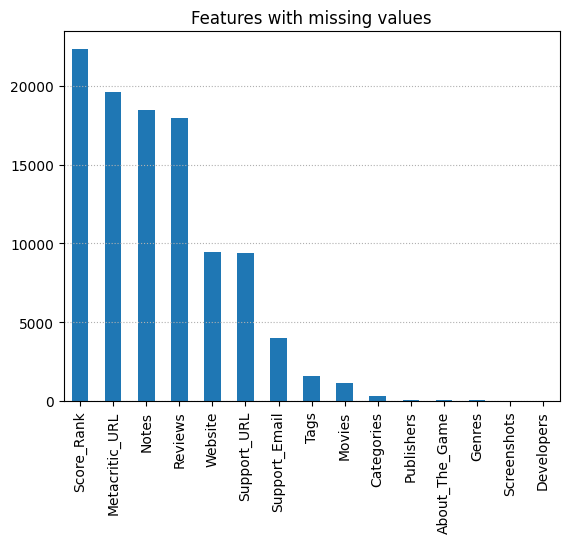

In [10]:
# MISSING VALUES
missing_mask = data_X.isna().sum() > 0
missing_values = data_X.isna().sum().sort_values(ascending=False)
missing_values = missing_values[missing_mask]
missing_values.plot(kind="bar")

plt.grid(axis="y", linestyle=":")
plt.title("Features with missing values")
plt.show();

In [11]:
data_X.Genres.nunique()

1347

In [12]:
selection_v1 = ["App_ID","Release_Date","Price","Supported_Languages","Support_URL","Windows","Mac","Linux","Positive","Negative","Achievements","Developers","Publishers","Categories","Genres"]
selection_v2 = ["App_ID","Name","Release_Date","Price","About_The_Game","Supported_Languages","Header_Image","Support_URL","Windows","Mac","Linux","Positive","Negative","Achievements","Developers","Publishers","Categories","Genres","Tags","Screenshots","Movies"]

In [13]:
data_X_select = data_X[selection_v1]
data_X_select.head()

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Positive,Negative,Achievements,Developers,Publishers,Categories,Genres
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,2510,293,None,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,0,0,25,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,174,28,98,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation"
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,86,12,None,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy"
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,0,0,14,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual


# Pre processing

In [14]:
import string
def basic_cleaning(sentence):
    # lowercase
    sentence = sentence.lower()
    # removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '  ') 
    # remove whitespaces
    sentence = sentence.strip()
    sentence = sentence.split("  ")
    sentence = [word.strip() for word in sentence]
    sentence = [word for word in sentence if word != ""]
    return sentence

In [15]:
import string
def basic_cleaning2(sentence):
    # lowercase
    sentence = sentence.lower()
    # removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # removing punctuation
    for punctuation in ["[","]","'","#","\\r\\n"]:
        sentence = sentence.replace(punctuation, '  ') 
    # remove whitespaces
    sentence = sentence.strip()
    sentence = sentence.split("  ")
    sentence = [word.strip() for word in sentence]
    sentence = [word for word in sentence if word != ""]
    return sentence

In [16]:
#df_test = data_X_select.copy()
#df_test = data_X

In [17]:
#df_test

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,...,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...",...,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],...,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],...,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,None,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],...,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",...,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,Kamtris,"12 May, 2020",0 - 20000,0,0,2.39,None,In the game you need to make love pairs by rot...,"['English', 'Russian', 'German', 'Spanish - Sp...",...,0,0,0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
22354,1831320,Rescue Team: Power Eaters,"22 Dec, 2021",0 - 20000,1,0,5.69,None,The Rescue Team is on standby when it starts r...,"['English', 'German', 'Russian']",...,0,0,0,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy","Casual,Adventure,Strategy,Clicker,Time Managem...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
22355,1248450,Totemlands,"3 Sep, 2021",0 - 20000,0,0,2.99,None,You are an adventurer who just arrived at the ...,"['English', 'French', 'Spanish - Spain', 'Port...",...,0,0,0,Hobofeller,Hobofeller,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie,Simulation","Cute,Exploration,Building,Colorful,Open World,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
22356,1597580,Clid The Snail,"15 Dec, 2021",0 - 20000,0,0,2.99,None,In a world where only the distant memory of hu...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Action,Adventure,Shooter,Top-Down Shooter,3D,T...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [18]:
#select Y as a function of months
counts = data_Y['App_ID'].value_counts()
data_Y = data_Y[data_Y['App_ID'].isin(counts[counts > 1].index)]
months = data_Y.iloc[:, 1].apply(lambda x: x.month)
years = data_Y.iloc[:, 1].apply(lambda x: x.year)
# Filtrer les lignes avec les dates comprises entre juillet 2012 et janvier 2024
#data_Y = data_Y[((months >= 7) & (years >= 2012)) & ((years <= 2024) & (months <= 1))]

#data_Y = data_Y[(data_Y.iloc[:, 1].apply(lambda x: x.month) >= 7) & (data_Y.iloc[:, 1].apply(lambda x: x.year) >= 2012)]

In [19]:
data_Y = data_Y[(data_Y['Month'] >= '2012-07-01') & (data_Y['Month'] <= '2024-01-31')]
#data_Y = data_Y[((data_Y.iloc[:, 1].apply(lambda x: x.year) <= 2024) & \
                 #(data_Y.iloc[:, 1].apply(lambda x: x.month) < 2))]

In [20]:
data_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768174 entries, 2 to 801270
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   App_ID        768174 non-null  int64         
 1   Month         768174 non-null  datetime64[ns]
 2   Avg. Players  768174 non-null  float64       
 3   Peak Players  768174 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 29.3 MB


In [21]:
data_Y

,App_ID,Month,Avg. Players,Peak Players
2,32400,2024-01-01,7.33,23.0
3,32400,2023-12-01,6.85,24.0
4,32400,2023-11-01,5.17,18.0
5,32400,2023-10-01,6.04,17.0
6,32400,2023-09-01,4.80,15.0
...,...,...,...,...
801266,278970,2015-10-01,29.24,125.0
801267,278970,2015-09-01,57.97,169.0
801268,278970,2015-08-01,106.67,230.0
801269,278970,2015-07-01,174.36,418.0


In [22]:
df_test = df_test[df_test['App_ID'].isin(data_Y['App_ID'])]

In [23]:
df_test['Release_Date'] = pd.to_datetime(df_test['Release_Date'])

#df_test.Supported_Languages = df_test.Supported_Languages.apply(basic_cleaning)
df_test.Supported_Languages = df_test.Supported_Languages.apply(basic_cleaning2)

#keep only games with at least english language
df_test = df_test[df_test['Supported_Languages'].apply(lambda x: 'english' in x)]

#transform support url with 1 if contains something, 0 otherwise
df_test.Support_URL = df_test['Support_URL'].apply(lambda x: 0 if x!=x else 1)

#encode bool values
df_test.Windows = df_test.Windows.apply(lambda x: 1 if x==True else 0)
df_test.Linux = df_test.Linux.apply(lambda x: 1 if x==True else 0)
df_test.Mac = df_test.Mac.apply(lambda x: 1 if x==True else 0)

df_test.Genres.fillna('No',inplace=True)
df_test.Genres = df_test.Genres.apply(lambda x: ''.join(x).split(','))

/tmp/ipykernel_11543/157558025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Release_Date'] = pd.to_datetime(df_test['Release_Date'])
/tmp/ipykernel_11543/157558025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Supported_Languages = df_test.Supported_Languages.apply(basic_cleaning2)


In [24]:
#unique_languages = df_test['Supported_Languages'].explode()
#unique_languages

0                    english
0                          ,
0                     french
0                          ,
0                     german
                ...         
22356                      ,
22356    traditional chinese
22357                english
22357                      ,
22357                russian
Name: Supported_Languages, Length: 172069, dtype: object

In [25]:
#unique_languages = df_test['Supported_Languages'].explode().unique()
#unique_languages

array(['english', ',', 'french', 'german', 'italian', 'spanish - spain',
       'spanish - latin america', 'simplified chinese',
       'traditional chinese', 'russian', 'japanese', 'korean',
       'portuguese - brazil', 'turkish', 'welsh', 'vietnamese', 'danish',
       'portuguese - portugal', 'dutch', 'polish', 'czech', 'ukrainian',
       'arabic', 'bulgarian', 'hungarian', 'greek', 'norwegian',
       'romanian', 'thai', 'finnish', 'swedish', 'croatian', 'estonian',
       'hebrew', 'icelandic', 'latvian', 'lithuanian', 'maori', 'slovak',
       'slovenian', 'indonesian', 'serbian', 'uzbek', 'urdu', 'armenian',
       'igbo', 'sindhi', 'sinhala', 'cherokee', 'galician', 'catalan',
       'afrikaans', 'kannada', 'luxembourgish', 'hindi', 'gujarati',
       'kyrgyz', 'kazakh', 'turkmen', ', k', 'iche', 'kinyarwanda',
       'tajik', 'odia', 'konkani', 'bangla', 'nepali', 'basque',
       'tigrinya', 'swahili', 'punjabi (gurmukhi)', 'punjabi (shahmukhi)',
       'georgian', 'wolof',

In [26]:
#unique_genres = df_test['Genres'].explode().unique()
#unique_genres

array(['Action', 'Casual', 'Indie', 'RPG', 'Simulation', 'Adventure',
       'Strategy', 'Design & Illustration', 'Video Production',
       'Early Access', 'Massively Multiplayer', 'Free to Play', 'Sports',
       'Animation & Modeling', 'Utilities', 'Game Development',
       'Photo Editing', 'Software Training', 'Nudity', 'Violent',
       'Racing', 'Gore', 'Sexual Content', 'No', 'Audio Production',
       'Web Publishing', 'Movie', 'Education', 'Accounting'], dtype=object)

In [27]:
df_test.Categories.fillna('No', inplace=True)
df_test.Categories = df_test.Categories.apply(lambda x: ''.join(x).split(','))

In [28]:
#unique_categories = df_test['Categories'].explode().unique()
#unique_categories

array(['Single-player', 'Steam Cloud', 'Family Sharing',
       'Steam Achievements', 'Partial Controller Support',
       'Full controller support', 'Multi-player', 'Steam Trading Cards',
       'Steam Workshop', 'Co-op', 'Online Co-op', 'Steam Leaderboards',
       'PvP', 'Online PvP', 'Remote Play on Phone',
       'Remote Play on Tablet', 'Remote Play on TV', 'In-App Purchases',
       'Tracked Controller Support', 'VR Only', 'MMO',
       'Cross-Platform Multiplayer', 'Stats', 'Includes level editor',
       'Shared/Split Screen', 'Remote Play Together', 'No',
       'VR Supported', 'Captions available', 'VR Support',
       'Shared/Split Screen PvP', 'Shared/Split Screen Co-op',
       'Valve Anti-Cheat enabled', 'LAN Co-op',
       'Steam Turn Notifications', 'HDR available', 'LAN PvP',
       'Commentary available', 'Includes Source SDK',
       'SteamVR Collectibles', 'Mods', 'Mods (require HL2)'], dtype=object)

In [30]:
df_test['TotalReviews'] = df_test['Positive'] + df_test['Negative']

df_test['ReviewScore'] = df_test['Positive'] / df_test['TotalReviews']

df_test['Rating'] = df_test['ReviewScore'] - (df_test['ReviewScore'] - 0.5) * 2 ** (- np.log10(df_test['TotalReviews']) + 1)

df_test.Rating.fillna(0,inplace=True)

/home/nicolas/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
#df_test.columns

Index(['App_ID', 'Name', 'Release_Date', 'Estimated_Owners', 'Peak_CCU',
       'Required_Age', 'Price', 'DLC_Count', 'About_The_Game',
       'Supported_Languages', 'Full_Audio_Languages', 'Reviews',
       'Header_Image', 'Website', 'Support_URL', 'Support_Email', 'Windows',
       'Mac', 'Linux', 'Metacritic_Score', 'Metacritic_URL', 'User_Score',
       'Positive', 'Negative', 'Score_Rank', 'Achievements', 'Recommendations',
       'Notes', 'Average_Playtime_Forever', 'Average_Playtime_2Weeks',
       'Median_Playtime_Forever', 'Median_Playtime_2Weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies',
       'TotalReviews', 'ReviewScore', 'Rating'],
      dtype='object')

In [33]:
df_test.drop(columns=['TotalReviews', 'ReviewScore'],inplace=True)

In [ ]:
df_test.Rating.fillna(0,inplace=True)
df_test.Rating

In [ ]:
df_test.Positive.isna().sum()

In [ ]:
df_test.Negative.isna().sum()

In [35]:
y_test = df_test[['App_ID','Rating']]
y_test

,App_ID,Rating
0,32400,0.822975
1,2060170,0.000000
2,1947530,0.715161
4,1771430,0.000000
5,413710,0.574865
...,...,...
22351,1607130,0.000000
22352,757380,0.620108
22354,1831320,0.532129
22356,1597580,0.633952


In [50]:
df_first_month = data_Y.groupby('App_ID',sort=False).last().reset_index()

In [58]:
df_first_month.drop(columns='Month',inplace=True)
df_first_month

,App_ID,Avg. Players,Peak Players
0,32400,14.05,38.0
1,2060170,17.22,58.0
2,1947530,21.92,67.0
3,2020480,24.55,100.0
4,1771430,2.46,8.0
...,...,...,...
16352,1607130,308.30,755.0
16353,757380,0.92,7.0
16354,1831320,9.36,23.0
16355,1597580,4.48,15.0


# DEEP model

In [66]:
data_X = pd.read_csv("../raw_data/games_infos.csv")
data_X.head()

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,...,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,None,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...",...,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1,A Superhero Beat em’ up with a kinky twist! So...,['English'],...,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,None,"Spin, craft, upgrade, and violate the laws of ...",['English'],...,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,None,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],...,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,None,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",...,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


In [67]:
data_Y = pd.read_csv("../raw_data/player_history.csv")
data_Y.head()

,App_ID,Month,Avg. Players,Peak Players
0,32400,Last 30 Days,7.92,27.0
1,32400,February 2024,6.67,19.0
2,32400,January 2024,7.33,23.0
3,32400,December 2023,6.85,24.0
4,32400,November 2023,5.17,18.0


In [71]:
def clean_target(data:pd.DataFrame) -> pd.DataFrame :
    '''clean and cut the target'''
    data = data[data['Month'] != 'Last 30 Days']
    data['Month'] = pd.to_datetime(data['Month'])
    counts = data['App_ID'].value_counts()
    data = data[data['App_ID'].isin(counts[counts > 1].index)]
    data = data[(data['Month'] >= '2012-07-01') & (data['Month'] <= '2024-01-31')]

    return data

def only_last_month_v1_target(data:pd.DataFrame) -> pd.DataFrame :
    '''V1 : select only the last 2 month to predict the avg # of players'''

    df = data.groupby('App_ID',sort=False).last().reset_index()
    df.drop(columns='Month',inplace=True)
    return df

def basic_cleaning(sentence:str) -> str :
    '''preprocess a basic cleaning for text in raw data'''

    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    for punctuation in ["[","]","'","#","\\r\\n"]:
        sentence = sentence.replace(punctuation, '  ')
    sentence = sentence.strip()
    sentence = sentence.split("  ")
    sentence = [word.strip() for word in sentence]
    sentence = [word for word in sentence if word != ""]

    return sentence

def clean_data(data_X:pd.DataFrame,data_Y:pd.DataFrame) -> pd.DataFrame:
    '''clean the features before entering pipelines'''

    Y = clean_target(data_Y)
    Y = only_last_month_v1_target(Y)
    
    data_X = data_X[selection_v1]

    # consistent features - target
    data_X = data_X[data_X['App_ID'].isin(Y['App_ID'])]
    data_X['Release_Date'] = pd.to_datetime(data_X['Release_Date'])

    # basic sentence cleaning
    data_X.Supported_Languages = data_X.Supported_Languages.apply(basic_cleaning)

    # keep only games with at least english language
    data_X = data_X[data_X['Supported_Languages'].apply(lambda x: 'english' in x)]

    # transform support url with 1 if contains something, 0 otherwise
    data_X.Support_URL = data_X['Support_URL'].apply(lambda x: 0 if x!=x else 1)

    # encode bool values
    data_X.Windows = data_X.Windows.apply(lambda x: 1 if x==True else 0)
    data_X.Linux = data_X.Linux.apply(lambda x: 1 if x==True else 0)
    data_X.Mac = data_X.Mac.apply(lambda x: 1 if x==True else 0)

    # handle categorical columns before encoding
    data_X.Genres.fillna('No',inplace=True)
    data_X.Genres = data_X.Genres.apply(lambda x: ''.join(x).split(','))
    data_X.Categories.fillna('No', inplace=True)
    data_X.Categories = data_X.Categories.apply(lambda x: ''.join(x).split(','))

    # Compute Rating for Y_rating target
    data_X['TotalReviews'] = data_X['Positive'] + data_X['Negative']
    data_X['ReviewScore'] = data_X['Positive'] / data_X['TotalReviews']
    data_X['Rating'] = data_X['ReviewScore'] - (data_X['ReviewScore'] - 0.5) * 2 ** (- np.log10(data_X['TotalReviews']) + 1)
    data_X.Rating.fillna(0,inplace=True)

    Y_rating = data_X[['App_ID','Rating']]
    data_X.drop(columns=['TotalReviews', 'ReviewScore','Positive','Negative'],inplace=True)

    return data_X, Y_rating, Y

In [72]:
X,Y_rating,Y = clean_data(data_X,data_Y)

/tmp/ipykernel_11543/2430335691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Month'])
/home/nicolas/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
X.head()

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Achievements,Developers,Publishers,Categories,Genres,Rating
0,32400,2009-09-16,5.89,"[english, ,, french, ,, german, ,, italian, ,,...",1,1,1,0,None,LucasArts,"LucasArts,Lucasfilm,Disney","[Single-player, Steam Cloud, Family Sharing]",[Action],0.822975
1,2060170,2023-04-25,16.79,[english],1,1,0,0,25,"Skyflare Studios,MrZGames",Skyflare Studios,"[Single-player, Steam Achievements, Partial Co...",[Action],0.000000
2,1947530,2023-09-26,3.99,[english],0,1,0,0,98,Bryce Summer,Bryce Summer,"[Single-player, Steam Cloud, Family Sharing]","[Casual, Indie, RPG, Simulation]",0.715161
4,1771430,2021-12-10,5.99,"[english, ,, spanish - spain, ,, spanish - lat...",0,1,1,1,14,Miel,Cherry Kiss Games,"[Single-player, Steam Achievements, Full contr...",[Casual],0.000000
5,413710,2015-12-10,19.99,"[english, ,, russian, ,, spanish - spain]",0,1,0,0,39,Snowbird Games,Snowbird Games,"[Single-player, Multi-player, Steam Trading Ca...","[Action, Adventure, Indie, RPG, Strategy]",0.574865


In [76]:
Y_rating.head()

,App_ID,Rating
0,32400,0.822975
1,2060170,0.000000
2,1947530,0.715161
4,1771430,0.000000
5,413710,0.574865


In [77]:
Y.head()

,App_ID,Avg. Players,Peak Players
0,32400,14.05,38.0
1,2060170,17.22,58.0
2,1947530,21.92,67.0
3,2020480,24.55,100.0
4,1771430,2.46,8.0


In [ ]:
from tensorflow.keras import models,layers